### Demo Project PCA:

### IMAGE COMPRESSING: Giảm Số chiều của ảnh

#####     Khai báo các thư viện cần sử dụng

In [19]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

* Hàm đọc đọc ảnh từ file ảnh, trả về ảnh được lưu dưới kiểu dữ liệu np.array

In [20]:
def read_image(filename):
    img = mpimg.imread(filename)
    return img

* Ảnh có 3 ciều với rows dòng, cols cột và colours kênh màu.
* Chuyển về thành 2 chiều với thành số dòng là rosw và số cột là cols*colours

In [21]:
def reshape_3d_to_2d(img):
    rows, cols, colours  = img.shape
    img_r = np.reshape(img, (rows, cols*colours)) 
    return img_r

* Trả về các thành phần chính của ảnh img_r truyền vào, số thành phần chính trả về phụ thuộc vào tham số NumOf_Principle_component.

In [22]:
def Principal_Component(img_r, NumOf_Principle_component):
    pca = PCA(NumOf_Principle_component).fit(img_r)
    return pca
    

* Compress ảnh theo số thành phần chính truyền vào, trả về ảnh đã được compress và tổng phương sai của thành phần chính

In [23]:
def Compress_image(img, NumOf_Principle_component):
    img_r = reshape_3d_to_2d(img)
    pca = Principal_Component(img_r, NumOf_Principle_component)

    img_transformed = pca.transform(img_r)
    result = pca.inverse_transform(img_transformed) 
    plt.imshow(result)
    rows, cols, colours  = img.shape
    result = np.reshape(result,(rows, cols, colours))
    sum_variance = sum(pca.explained_variance_ratio_)
    return result, sum_variance


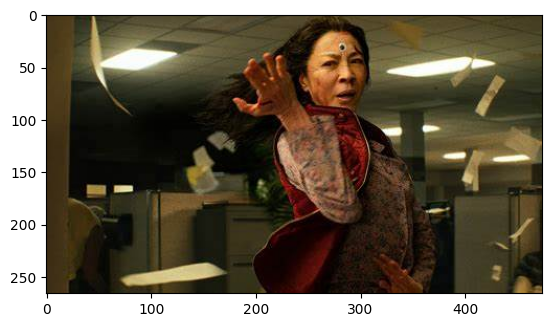

In [24]:
# Đọc ảnh từ đường dẫn
image_path = 'input_compress.png'
img = read_image(image_path)
# In ảnh ra màn hình output
plt.imshow(img)

* Lần lượt compress và so sánh kết quả của 8, 32, 64 thành phần chính.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Với 8 thành phần ta có thể thể hiện 83.46162475645542% phương sai


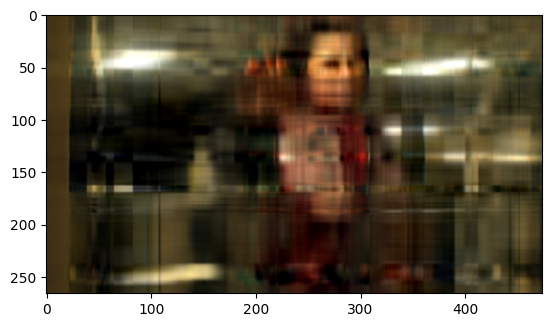

In [25]:
compress8, sum8 = Compress_image(img,8)
print(f'Với 8 thành phần ta có thể thể hiện {sum8*100}% phương sai')
plt.imshow(compress8)
plt.savefig('output_compress8.png',format = 'png')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Với 32 thành phần ta có thể thể hiện 96.55097952345386% phương sai


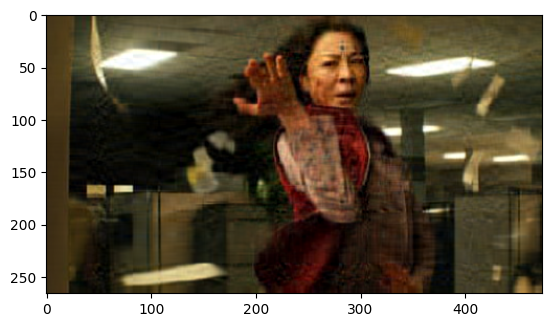

In [26]:
compress32, sum32 = Compress_image(img,32)
print(f'Với 32 thành phần ta có thể thể hiện {sum32*100}% phương sai')
plt.imshow(compress32)
plt.savefig('output_compress32.png',format = 'png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Với 64 thành phần ta có thể thể hiện 98.90405536571052% phương sai


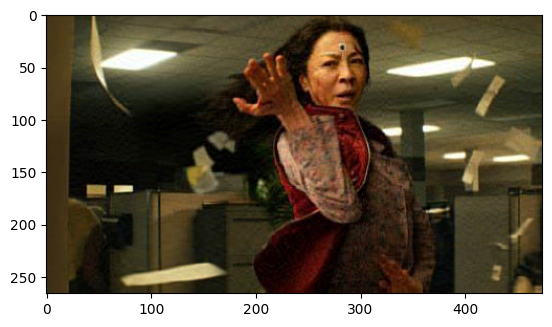

In [27]:
compress64, sum64 = Compress_image(img,64)
print(f'Với 64 thành phần ta có thể thể hiện {sum64*100}% phương sai')
plt.imshow(compress64)
plt.savefig('output_compress64.png',format = 'png')